In [8]:
import numpy as np

file_path = "/iblm/netapp/data4/Frazer_collab/training_results/carter_collab/ipscs/basset/haps_genome/haps_val_predictions_nbddual.npy"


data = np.load(file_path, allow_pickle=True)
  

In [9]:
import numpy as np
import pandas as pd

# Load the data
file_path = "/iblm/netapp/data4/Frazer_collab/training_results/carter_collab/ipscs/basset/haps_genome/haps_val_predictions_nbddual.npy"
data = np.load(file_path, allow_pickle=True)

# Get the content of the scalar array
content = data.item()

# Check the type of the content
print("Type of content:", type(content))

if isinstance(content, dict):
    print("It's a dictionary!")
    print("Keys:", list(content.keys()))
    print("Value types:")
    for key, value in content.items():
        print(f"  {key}: {type(value)}")
    
    # If it's a dictionary of DataFrames
    if all(isinstance(v, pd.DataFrame) for v in content.values()):
        print("\nIt's a dictionary of DataFrames!")
        for key, df in content.items():
            print(f"\nDataFrame '{key}':")
            print(f"Shape: {df.shape}")
            print(f"Columns: {df.columns.tolist()}")
            print(f"First few rows:\n{df.head()}")

elif isinstance(content, pd.DataFrame):
    print("It's a pandas DataFrame!")
    print("Shape:", content.shape)
    print("Columns:", content.columns.tolist())
    print("First few rows:")
    print(content.head())

elif isinstance(content, np.ndarray):
    print("It's a NumPy array!")
    print("

numpy.ndarray

In [10]:
print("Array shape:", data.shape)



Array shape: ()


In [6]:
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

def load_dfs(base_path):
    """Load DataFrames from all CSV files in the given directory."""
    dfs = {}
    csv_files = [f for f in os.listdir(base_path) if f.endswith('.csv')]
    for csv_file in csv_files:
        treatment = os.path.splitext(csv_file)[0]
        df_path = os.path.join(base_path, csv_file)
        dfs[treatment] = pd.read_csv(df_path)
    return dfs

In [2]:
base_path = "/iblm/netapp/data4/Frazer_collab/project_repos/inference-branch/inference_pipeline/pipelines/data_pipeline/output/dfs/ipscs/basset"
    
# Call the function and load the dataframes
dfs = load_dfs(base_path)

In [3]:
# Print the keys (treatment names) and the first few rows of each dataframe
for key, df in dfs.items():
    print(f"DataFrame for {key}:")
    print(df.head())  # Print the first few rows of each DataFrame
    print("\n")

DataFrame for Combined-loss_obs_preds:
                  Observed Sample Names                Predicted Sample Names  \
0  001a6b85-bf54-4e81-b4f7-cff27a06e863  001a6b85-bf54-4e81-b4f7-cff27a06e863   
1  001a6b85-bf54-4e81-b4f7-cff27a06e863  001a6b85-bf54-4e81-b4f7-cff27a06e863   
2  001a6b85-bf54-4e81-b4f7-cff27a06e863  001a6b85-bf54-4e81-b4f7-cff27a06e863   
3  001a6b85-bf54-4e81-b4f7-cff27a06e863  001a6b85-bf54-4e81-b4f7-cff27a06e863   
4  001a6b85-bf54-4e81-b4f7-cff27a06e863  001a6b85-bf54-4e81-b4f7-cff27a06e863   

   Peak Indexes Chromosomes  caQTL Indices  ASOC Index  \
0             0        chr2          False        True   
1             1        chr2          False       False   
2             2        chr2          False       False   
3             3        chr2          False       False   
4             4        chr2          False       False   

   Observed ASOC fdr_pval  Observed Hap1  Observed Hap2  Observed TN5  \
0                 0.64831            4.0           1

In [7]:
def multi_plot(model_name, preds, obs, x_label, y_label, title, metric_type, ax, x_min=None, x_max=None, y_min=None, y_max=None):
    # Remove NaNs from preds and obs
    mask = ~(np.isnan(preds) | np.isnan(obs))
    preds = preds[mask]
    obs = obs[mask]

    # Check for constant data
    if np.unique(preds).size == 1 or np.unique(obs).size == 1:
        print(f"Warning: Constant data detected for {title}. Skipping plot.")
        ax.text(0.5, 0.5, "Constant data detected\nSkipping plot", ha='center', va='center', fontsize=12)
        ax.set_axis_off()
        return

    ax.scatter(preds, obs, s=5, alpha=0.40, marker='o', edgecolor='black', facecolor='white')
    ax.grid(alpha=0.2)

    # Calculate the buffer based on the range of the data
    x_buffer = (preds.max() - preds.min()) * 0.05  # 5% of the data range
    y_buffer = (obs.max() - obs.min()) * 0.05  # 5% of the data range

    # Set consistent x and y axis limits with the buffer
    if x_min is None or x_max is None:
        x_min, x_max = preds.min() - x_buffer, preds.max() + x_buffer
    if y_min is None or y_max is None:
        y_min, y_max = obs.min() - y_buffer, obs.max() + y_buffer

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # Calculate Pearson correlation coefficient
    pearson_r, _ = pearsonr(preds, obs)

    # Set labels and title with appropriate font sizes and bold fontweight for x and y labels
    ax.set_xlabel(x_label, fontsize=12, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=14, fontweight='bold')

    annotation_text = f"Pearson r = {pearson_r:.2f}"
    ax.text(0.05, 0.92, annotation_text, fontsize=10, fontweight='bold', verticalalignment='top', transform=ax.transAxes, bbox=dict(boxstyle="square,pad=0.5", facecolor="#F0F0F0", edgecolor="#636363"))

    # Add solid red lines in the middle of x and y axis
    ax.axhline(y=0, color='red', linestyle='-', linewidth=1)
    ax.axvline(x=0, color='red', linestyle='-', linewidth=1)

def create_tn5_plot(dfs, model_name, plot_caqtl_only=False):
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    axs = axs.flatten()

    for i, (key, df) in enumerate(dfs.items()):
        ax = axs[i]
        modeling_data = key.split('_')[0]

        if plot_caqtl_only and "caQTL Indices" in df.columns:
            df = df[df["caQTL Indices"] == True]

        x = df["TN5 Preds"]
        y = df["TN5 Obs"]
        xlabel = "Predicted Tn5"
        ylabel = "Observed Tn5"
        x_lim = (0, 700)
        y_lim = (0, 1600)

        multi_plot(model_name, x, y, xlabel, ylabel, f"{modeling_data} -ipscs-", "Tn5", ax, x_min=x_lim[0], x_max=x_lim[1], y_min=y_lim[0], y_max=y_lim[1])

    suptitle = f'{model_name} - TN5 Comparison'
    if plot_caqtl_only:
        suptitle += ' (caQTL Regions Only)'

    fig.suptitle(suptitle, fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    filename = f'{model_name}_tn5_comparison'
    if plot_caqtl_only:
        filename += '_caqtl_only'
    filename += '.pdf'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()



In [8]:
def create_allelic_imbalance_plot(dfs, model_name):
    fig, axs = plt.subplots(2, 2, figsize=(16, 16))
    axs = axs.flatten()

    for i, (key, df) in enumerate(dfs.items()):
        ax = axs[i]
        modeling_data = key.split('_')[0]

        # Always apply ASOC filter
        if "ASOC Index" in df.columns:
            df = df[df["ASOC Index"] == True]
        else:
            print(f"Warning: 'ASOC Index' column not found in DataFrame {key}. Plotting without ASOC filtering.")

        x = df["Allelic Imbalance "]
        y = df["Allelic Imbalance Obs"]
        xlabel = "Predicted Log Allelic Imbalance"
        ylabel = "Observed Log Allelic Imbalance"
        x_lim = (-1.5, 1.5)
        y_lim = (-1.5, 1.5)

        multi_plot(model_name, x, y, xlabel, ylabel, f"{modeling_data} -ipscs-", "Log allelic imbalance", ax, x_min=x_lim[0], x_max=x_lim[1], y_min=y_lim[0], y_max=y_lim[1])

    suptitle = f'{model_name} - Allelic Imbalance Comparison (ASOC Filtered)'
    fig.suptitle(suptitle, fontsize=20, fontweight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    filename = f'{model_name}_allelic_imbalance_comparison_asoc_filtered.pdf'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()


KeyError: 'Allelic Imbalance Preds'

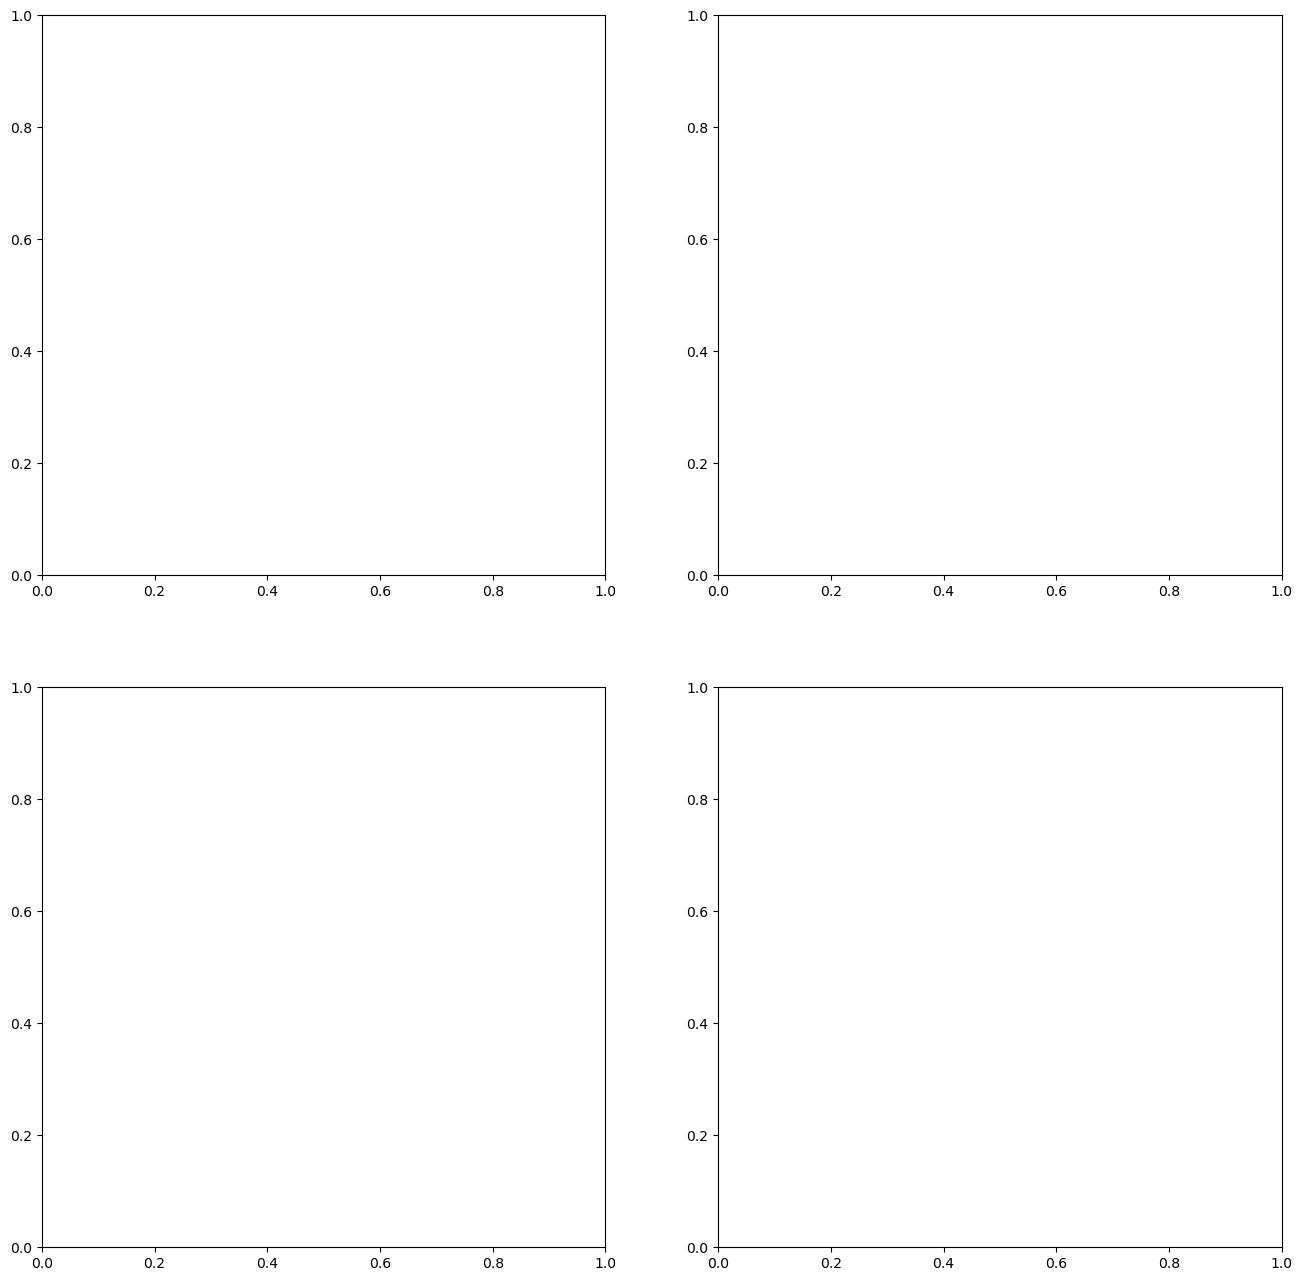

In [9]:
create_allelic_imbalance_plot(dfs, "VA")